In [2]:
import copy

import numpy as np
import pandas as pd
import rasterio
from rasterio.windows import from_bounds
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from tqdm import tqdm
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
        
BH_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/BH_tif_400_400_after_processing.csv', sep = ',', header = None)
BV_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/BV_tif_400_400_after_processing.csv', sep = ',', header = None)
CNM_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/CNM_tif_400_400_after_processing.csv', sep = ',', header = None)
LAI_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/LAI_tif_400_400_after_processing.csv', sep = ',', header = None)
DSM_tif_400_400_after_processing = pd.read_csv('useful_data_after_processing/DSM_tif_400_400_after_processing.csv', sep = ',', header = None)
Air_Temperature_C_400_400_after_processing = pd.read_csv('useful_data_after_processing/Air_Temperature_C_400_400_after_processing.csv', sep = ',', header = None)
Dew_Point_C_400_400_after_processing = pd.read_csv('useful_data_after_processing/Dew_Point_C_400_400_after_processing.csv', sep = ',', header = None)
Relative_Humidity_400_400_after_processing = pd.read_csv('useful_data_after_processing/Relative_Humidity_400_400_after_processing.csv', sep = ',', header = None)
Wind_Speed_400_400_after_processing = pd.read_csv('useful_data_after_processing/Wind_Speed_400_400_after_processing.csv', sep = ',', header = None)


In [4]:
import numpy as np
from scipy import stats

def analyze_layers(inpute, name=None):
    print(f"分析 {name if name else '输入'} 层：")

    # 总体最值
    min_value = np.min(inpute)
    max_value = np.max(inpute)
    
    # 形状
    print(f"形状: {inpute.shape}")

    # 展平
    layer = inpute.values.flatten()
    unique, counts = np.unique(layer, return_counts=True)

    # 统计只出现1次的数值
    once_values = unique[counts == 1]
    num_once = len(once_values)

    # 计算均值、方差和中位数，最值
    mean_once = np.mean(once_values) if num_once > 0 else None
    var_once = np.var(once_values) if num_once > 0 else None
    median_once = np.median(once_values) if num_once > 0 else None
    min_once = np.min(once_values) if num_once > 0 else None
    max_once = np.max(once_values) if num_once > 0 else None

    # 统计只出现2次的数值
    twice_values = unique[counts == 2]
    num_twice = len(twice_values)

    # 计算均值、方差和中位数
    mean_twice = np.mean(twice_values) if num_twice > 0 else None
    var_twice = np.var(twice_values) if num_twice > 0 else None
    median_twice = np.median(twice_values) if num_twice > 0 else None
    min_twice = np.min(twice_values) if num_twice > 0 else None
    max_twice = np.max(twice_values) if num_twice > 0 else None

    # 统计只出现3次的数值
    thrice_values = unique[counts == 3]
    num_thrice = len(thrice_values)

    # 计算均值、方差和中位数
    mean_thrice = np.mean(thrice_values) if num_thrice > 0 else None
    var_thrice = np.var(thrice_values) if num_thrice > 0 else None
    median_thrice = np.median(thrice_values) if num_thrice > 0 else None
    min_thrice = np.min(thrice_values) if num_thrice > 0 else None
    max_thrice = np.max(thrice_values) if num_thrice > 0 else None

    # 统计不止出现3次的数值及其对应出现次数
    more_than_once = dict(zip(unique[counts > 3], counts[counts > 3]))

    # 打印输出结果
    print(f"总体最小值: {min_value}, 总体最大值: {max_value}")
    print(f"只出现1次的数值共有 {num_once} 个，它们出现了 {np.sum(counts[counts == 1])} 次。它们的均值、方差、中位数、最小值、最大值分别是 {mean_once}, {var_once}, {median_once}, {min_once}, {max_once}")
    print(f"只出现2次的数值共有 {num_twice} 个，它们出现了 {np.sum(counts[counts == 2])} 次。它们的均值、方差、中位数、最小值、最大值分别是 {mean_twice}, {var_twice}, {median_twice}, {min_twice}, {max_twice}")
    print(f"只出现3次的数值共有 {num_thrice} 个，它们出现了 {np.sum(counts[counts == 3])} 次。它们的均值、方差、中位数、最小值、最大值分别是 {mean_thrice}, {var_thrice}, {median_thrice}, {min_thrice}, {max_thrice}")
    if more_than_once:
        print("不止出现3次的数值及其对应出现次数进行逆序排列如下：")
        for value, count in sorted(more_than_once.items(), key=lambda x: x[1], reverse=True):
            print(f"{value:>10}  : {value.dtype} : {count}")
    else:
        print("没有不止出现1次的数值。")
    print()


In [5]:
# analyze_layers(BH_tif_400_400_after_processing, '建筑物高度')


In [6]:
# analyze_layers(BV_tif_400_400_after_processing, '建筑物体积')

In [7]:
# analyze_layers(CNM_tif_400_400_after_processing, '树冠高度')

In [8]:
# analyze_layers(LAI_tif_400_400_after_processing, '叶面积指数')

In [9]:
# analyze_layers(DSM_tif_400_400_after_processing, '地形数据')

In [10]:
# analyze_layers(Air_Temperature_C_400_400_after_processing, '空气温度')

In [11]:
# analyze_layers(Dew_Point_C_400_400_after_processing, '露点温度')

In [12]:
# analyze_layers(Relative_Humidity_400_400_after_processing, '相对湿度')

In [13]:
# analyze_layers(Wind_Speed_400_400_after_processing, '风速')

## 数据检查

In [14]:
X = np.stack([BH_tif_400_400_after_processing, BV_tif_400_400_after_processing, CNM_tif_400_400_after_processing, LAI_tif_400_400_after_processing, DSM_tif_400_400_after_processing], axis=-1)
Y = np.stack([Air_Temperature_C_400_400_after_processing, Dew_Point_C_400_400_after_processing, Relative_Humidity_400_400_after_processing, Wind_Speed_400_400_after_processing], axis=-1)

In [15]:
X.shape

(400, 400, 5)

In [16]:
Y.shape

(400, 400, 4)

In [17]:
# 展平X和Y
X_flatten = X.reshape(-1, 5)  # X 变成形状 (160000, 5)
Y_flatten = Y.reshape(-1, 4)  # Y 变成形状 (160000, 4)

In [18]:
X_flatten.shape

(160000, 5)

In [19]:
Y_flatten.shape

(160000, 4)

In [20]:
X_reshaped = X_flatten
Y_reshaped = Y_flatten

In [21]:
X_reshaped.shape

(160000, 5)

In [22]:
Y_reshaped.shape

(160000, 4)

In [23]:
X_contains_nan_or_inf = np.isnan(X_reshaped).any() or np.isinf(X_reshaped).any()
Y_contains_nan_or_inf = np.isnan(Y_reshaped).any() or np.isinf(Y_reshaped).any()

print("X contains NaN or Infinity:", X_contains_nan_or_inf)
print("Y contains NaN or Infinity:", Y_contains_nan_or_inf)

X contains NaN or Infinity: False
Y contains NaN or Infinity: False


In [24]:
print("X min:", X_reshaped.min(), "X max:", X_reshaped.max())
print("Y min:", Y_reshaped.min(), "Y max:", Y_reshaped.max())


X min: -5.016123294830321 X max: 1470306.4419853743
Y min: 0.3906410594318859 Y max: 69.43959655478638


In [25]:
# 深复制X
X_400_400 = X.copy()
Y_400_400 = Y.copy()

In [26]:
# 读取数据
X = X_reshaped
Y = Y_reshaped
X.shape, Y.shape

((160000, 5), (160000, 4))

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import time
from datetime import datetime

In [34]:
# 定义进度条回调函数
class TqdmProgressCallback:
    def __init__(self, total_iterations, model_idx):
        self.pbar = tqdm(total=total_iterations, desc=f"Optimizing Model {model_idx+1}")

    def __call__(self, result):
        self.pbar.update(1)

    def close(self):
        self.pbar.close()

In [35]:
# 定义随机森林的超参数搜索空间
search_space = {
    'n_estimators': Integer(100, 300),  # 决策树数量
    'max_depth': Integer(10, 30),  # 最大深度
    'max_features': Categorical(['sqrt', 'log2', None]), # 最大特征数，None表示使用所有特征
    'min_samples_split': Integer(2, 10),  # 最小分裂样本数
    'min_samples_leaf': Integer(1, 4),  # 最小叶子节点样本数
    # 'bootstrap': Categorical([True])  # 由于袋外估计必须使用自助采样法，因此固定其值
}


In [36]:
# 初始化随机森林模型
model = RandomForestRegressor(random_state=42, oob_score=True)

In [37]:
# 用于储存模型的特征重要性
importance_matrix = np.zeros((X_reshaped.shape[1], Y_reshaped.shape[1]))

n_iter = 10  # 迭代次数


In [38]:
scoring = {
    'mse': 'neg_mean_squared_error',  # Mean Squared Error 均方误差
    'r2': 'r2',  # R² Coefficient of Determination 决定系数
    'mae': 'neg_mean_absolute_error',  # Mean Absolute Error 平均绝对误差
}

In [39]:
# 使用贝叶斯优化进行超参数搜索
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=search_space,
    n_iter=n_iter,  # 迭代次数
    cv=5,  # 5 折交叉验证
    n_jobs=-1,  # 使用所有可用的核
    verbose=0,  # 显示详细信息
    scoring=scoring, # 评分标准
    refit='mse' # 使用负均方误差作为评分, 这样scoring里的值都会被计算和储存，但是只使用mse作为优化标准
)

In [59]:
%%time
# 开始贝叶斯优化并找到最佳参数
print("Optimizing model")
progress_callback = TqdmProgressCallback(total_iterations=n_iter, model_idx=0)

# 第一次贝叶斯优化
print('----------start fit----------')
bayes_search.fit(X, Y[:, 0], callback=[progress_callback])
print('----------end fit----------')

# 显式关闭进度条
progress_callback.close()


Optimizing model



Optimizing Model 1:   0%|          | 0/10 [00:00<?, ?it/s]

----------start fit----------



Optimizing Model 1: 100%|██████████| 10/10 [15:14<00:00, 91.49s/it]

----------end fit----------
CPU times: total: 17.1 s
Wall time: 15min 14s


In [111]:
# 提取优化后的最佳参数
best_params = bayes_search.best_params_

In [112]:
# 打印最佳参数
best_params

OrderedDict([('max_depth', 12),
             ('max_features', 'log2'),
             ('min_samples_leaf', 3),
             ('min_samples_split', 6),
             ('n_estimators', 296)])

In [113]:
# 
bayes_search.cv_results_

{'mean_fit_time': array([ 45.97465358, 120.92496452,  82.46769347,  36.40848322,
         64.52939601, 152.81682963, 122.67364264,  67.44659138,
         52.66492434,  46.77022424]),
 'std_fit_time': array([0.65450958, 4.67557867, 3.8812348 , 0.97772776, 2.21626316,
        8.53858926, 5.40713936, 1.18139946, 0.75974959, 3.25909473]),
 'mean_score_time': array([0.67600241, 0.76240587, 0.53942609, 0.53124681, 0.86332746,
        1.18141532, 0.87021708, 0.86300106, 0.58082972, 0.63973975]),
 'std_score_time': array([0.07011169, 0.08430719, 0.08687753, 0.06996639, 0.16596928,
        0.23459127, 0.13029869, 0.10869009, 0.07276939, 0.09237705]),
 'param_max_depth': masked_array(data=[16, 17, 24, 19, 26, 28, 25, 16, 12, 26],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_max_features': masked_array(data=['log2', None, None, 'log2', 'sqrt', None, None, 'log2',
                    'log2', 'sqrt

## 储存某次的优化结果
bayes_search.cv_results_={
 'mean_fit_time': array([ 28.55289884, 155.50317574,  52.50600681,  91.00274124,
         66.90605783,  23.31525884,  74.57730494,  23.05400348,
         44.88403435,  39.85511346]),
 'std_fit_time': array([0.54538374, 7.96362842, 0.64139296, 1.40312096, 1.6577354 ,
        0.30543965, 0.77421921, 0.1786838 , 2.19447796, 0.61888006]),
 'mean_score_time': array([0.43226819, 1.38214898, 0.56199446, 1.42403045, 0.95648804,
        0.27831697, 1.14831452, 0.23273978, 0.55242758, 0.50476799]),
 'std_score_time': array([0.01843124, 0.14913223, 0.05973453, 0.25503474, 0.11458144,
        0.08118022, 0.10377971, 0.0228234 , 0.0392118 , 0.06492125]),
 'param_max_depth': masked_array(data=[22, 30, 13, 28, 30, 12, 20, 11, 14, 14],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_max_features': masked_array(data=['sqrt', None, 'log2', 'sqrt', 'log2', 'log2', 'sqrt',
                    'log2', 'log2', 'sqrt'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 2, 2, 1, 4, 4, 2, 4, 1, 4],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_min_samples_split': masked_array(data=[7, 6, 9, 4, 8, 6, 4, 4, 5, 3],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[122, 299, 280, 288, 232, 122, 294, 143, 214, 208],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [OrderedDict([('max_depth', 22),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 2),
               ('min_samples_split', 7),
               ('n_estimators', 122)]),
  OrderedDict([('max_depth', 30),
               ('max_features', None),
               ('min_samples_leaf', 2),
               ('min_samples_split', 6),
               ('n_estimators', 299)]),
  OrderedDict([('max_depth', 13),
               ('max_features', 'log2'),
               ('min_samples_leaf', 2),
               ('min_samples_split', 9),
               ('n_estimators', 280)]),
  OrderedDict([('max_depth', 28),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 1),
               ('min_samples_split', 4),
               ('n_estimators', 288)]),
  OrderedDict([('max_depth', 30),
               ('max_features', 'log2'),
               ('min_samples_leaf', 4),
               ('min_samples_split', 8),
               ('n_estimators', 232)]),
  OrderedDict([('max_depth', 12),
               ('max_features', 'log2'),
               ('min_samples_leaf', 4),
               ('min_samples_split', 6),
               ('n_estimators', 122)]),
  OrderedDict([('max_depth', 20),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 2),
               ('min_samples_split', 4),
               ('n_estimators', 294)]),
  OrderedDict([('max_depth', 11),
               ('max_features', 'log2'),
               ('min_samples_leaf', 4),
               ('min_samples_split', 4),
               ('n_estimators', 143)]),
  OrderedDict([('max_depth', 14),
               ('max_features', 'log2'),
               ('min_samples_leaf', 1),
               ('min_samples_split', 5),
               ('n_estimators', 214)]),
  OrderedDict([('max_depth', 14),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 4),
               ('min_samples_split', 3),
               ('n_estimators', 208)])],
 'split0_test_mse': array([-0.00314969, -0.003404  , -0.00299522, -0.00320047, -0.00309079,
        -0.00297859, -0.00314615, -0.00293712, -0.00305422, -0.00301126]),
 'split1_test_mse': array([-0.00367954, -0.0039521 , -0.00304658, -0.00379419, -0.00366611,
        -0.00295142, -0.00361088, -0.00284054, -0.0031712 , -0.00314926]),
 'split2_test_mse': array([-0.00325977, -0.00342563, -0.0031388 , -0.00335028, -0.00329055,
        -0.00311705, -0.00322929, -0.00310303, -0.00314138, -0.00315347]),
 'split3_test_mse': array([-0.00301282, -0.00318465, -0.00281375, -0.00310288, -0.00305586,
        -0.00279048, -0.00298284, -0.0027541 , -0.00284909, -0.00284888]),
 'split4_test_mse': array([-0.00397664, -0.00420554, -0.00364901, -0.00413234, -0.00407106,
        -0.00360221, -0.00394333, -0.00353378, -0.00371502, -0.00370656]),
 'mean_test_mse': array([-0.00341569, -0.00363438, -0.00312867, -0.00351603, -0.00343487,
        -0.00308795, -0.0033825 , -0.00303372, -0.00318618, -0.00317389]),
 'std_test_mse': array([0.00035823, 0.00038107, 0.00028092, 0.00038858, 0.00038499,
        0.00027727, 0.00034807, 0.00027557, 0.00028738, 0.00028874]),
 'rank_test_mse': array([ 7, 10,  3,  9,  8,  2,  6,  1,  5,  4]),
 

splitX_test_mse：
- 含义：split0_test_mse、split1_test_mse 等是不同折交叉验证中，在每一折上对测试集计算的均方误差（MSE）。其中的 X 表示折数（从0开始）。
- 负号的原因：Scikit-Learn 在进行优化时，通常希望最大化评分。因此，对于需要最小化的损失函数（如MSE），Scikit-Learn 会将其存储为负值，以便与其他评分方式（如R²）一致地进行优化。
- 值：这些数组中的每个值对应于一个超参数组合在该折交叉验证中的MSE。

mean_test_mse：
- 含义：这是所有交叉验证折的测试集均方误差（MSE）的平均值。该值通常用于评估每个超参数组合的整体表现。
- 负号的原因：同样，MSE 是损失函数，因此 Scikit-Learn 存储其为负值以便于优化。你可以通过取反来得到实际的均方误差。

std_test_mse：
- 含义：这是在所有交叉验证折上计算的 MSE 标准差，表示该超参数组合在不同交叉验证折之间的表现一致性。较小的标准差表示该超参数组合在不同数据集上表现更一致。
- 值：这些值是标准差，用于衡量模型在不同折上的表现波动。

rank_test_mse：
- 含义：这是根据 mean_test_mse 对所有超参数组合进行排序后的排名。1 表示表现最好的参数组合，数字越大表示表现越差。
- 值：这些值是排名，用于快速识别最佳的参数组合。

 'split0_test_r2': array([ 0.03649199, -0.04130479,  0.08374358,  0.02095808,  0.05451029,
         0.08883226,  0.03757433,  0.10151746,  0.06569649,  0.07883888]),
 'split1_test_r2': array([-0.17892284, -0.26625028,  0.02387768, -0.21565647, -0.17461737,
         0.0543681 , -0.15692174,  0.08989159, -0.01605045, -0.00902198]),
 'split2_test_r2': array([-0.13331823, -0.19098099, -0.09126124, -0.1647846 , -0.14401791,
        -0.08370052, -0.1227201 , -0.07882384, -0.09215823, -0.09636228]),
 'split3_test_r2': array([-0.17730976, -0.24445503, -0.09952139, -0.21250353, -0.19412785,
        -0.09042801, -0.1655939 , -0.07621163, -0.11332923, -0.11324614]),
 'split4_test_r2': array([-0.80625985, -0.910231  , -0.65744157, -0.87698071, -0.84914693,
        -0.63618698, -0.7911284 , -0.6051059 , -0.68742769, -0.68358576]),
 'mean_test_r2': array([-0.25186374, -0.33064442, -0.14812059, -0.28979345, -0.26147995,
        -0.13342303, -0.23975796, -0.11374646, -0.16865382, -0.16467546]),
 'std_test_r2': array([0.28824843, 0.30023961, 0.26394966, 0.30608908, 0.30694659,
        0.2614404 , 0.28530074, 0.25763135, 0.26692567, 0.26836796]),
 'rank_test_r2': array([ 7, 10,  3,  9,  8,  2,  6,  1,  5,  4]),
 
splitX_test_r2：
- 含义：split0_test_r2、split1_test_r2 等是不同折交叉验证中，在每一折上对测试集计算的 R² 分数。其中的 X 表示折数（从0开始）。
- 值：这些数组中的每个值对应于一个超参数组合在该折交叉验证中的 R² 分数。
- 解释各个 R² 分数的含义：
    - R² 取值大于 0：表示模型能够解释一部分方差，值越接近 1，表示模型拟合得越好。
    - R² 取值等于 0：表示模型的预测能力和简单的平均值模型一样。
    - R² 取值小于 0：表示模型的表现还不如直接用平均值预测好，这通常意味着模型不适合当前数据。
- 在你的结果中，splitX_test_r2 的某些值为负，这意味着在某些折上，模型的预测效果还不如简单地用目标变量的平均值进行预测。这可能表明模型过拟合、欠拟合，或者数据本身具有很高的噪声。





mean_test_r2：
- 含义：这是所有交叉验证折的 R² 分数的平均值。该值通常用于评估每个超参数组合的整体表现。
- 值：mean_test_r2 反映了模型在交叉验证过程中总体上的拟合优度。负值表示模型总体上并没有很好地拟合数据。

std_test_r2：
- 含义：这是在所有交叉验证折上计算的 R² 分数的标准差，表示该超参数组合在不同交叉验证折之间的表现一致性。较小的标准差表示该超参数组合在不同数据集上表现更一致。
- 值：std_test_r2 的值越小，表示模型在不同折上的表现波动越小，模型的稳定性更好。

rank_test_r2：
- 含义：这是根据 mean_test_r2 对所有超参数组合进行排序后的排名。1 表示表现最好的参数组合，数字越大表示表现越差。
- 值：rank_test_r2 的值用于快速识别最佳的参数组合。排名为 1 的组合是 R² 分数表现最好的组合。

 'split0_test_mae': array([-0.04200953, -0.04376363, -0.04087904, -0.04236879, -0.04154537,
        -0.04079124, -0.04199233, -0.04052508, -0.04124006, -0.04094894]),
 'split1_test_mae': array([-0.04860571, -0.05002574, -0.04522395, -0.04920039, -0.0485336 ,
        -0.044706  , -0.0482044 , -0.0442033 , -0.04592036, -0.04575566]),
 'split2_test_mae': array([-0.04758374, -0.04798962, -0.04750999, -0.04785285, -0.04759882,
        -0.04752959, -0.04740279, -0.04755268, -0.04746269, -0.04753878]),
 'split3_test_mae': array([-0.04633569, -0.04719833, -0.04503293, -0.04680706, -0.04649121,
        -0.0448956 , -0.04619349, -0.04473143, -0.04532353, -0.04528548]),
 'split4_test_mae': array([-0.05339434, -0.05427687, -0.05214694, -0.05407761, -0.05390274,
        -0.05193531, -0.05329677, -0.05158406, -0.05249817, -0.0524209 ]),
 'mean_test_mae': array([-0.0475858 , -0.04865084, -0.04615857, -0.04806134, -0.04761435,
        -0.04597155, -0.04741796, -0.04571931, -0.04648896, -0.04638995]),
 'std_test_mae': array([0.00367252, 0.00346336, 0.0036797 , 0.00378192, 0.00396189,
        0.00367665, 0.00363637, 0.00368811, 0.00364119, 0.00371265]),
 'rank_test_mae': array([ 7, 10,  3,  9,  8,  2,  6,  1,  5,  4])}

In [114]:
# 获取所有的参数组合列表
params_list = bayes_search.cv_results_['params']

In [115]:
# 所有的参数组合列表
params_list

[OrderedDict([('max_depth', 16),
              ('max_features', 'log2'),
              ('min_samples_leaf', 3),
              ('min_samples_split', 7),
              ('n_estimators', 222)]),
 OrderedDict([('max_depth', 17),
              ('max_features', None),
              ('min_samples_leaf', 3),
              ('min_samples_split', 5),
              ('n_estimators', 239)]),
 OrderedDict([('max_depth', 24),
              ('max_features', None),
              ('min_samples_leaf', 3),
              ('min_samples_split', 9),
              ('n_estimators', 138)]),
 OrderedDict([('max_depth', 19),
              ('max_features', 'log2'),
              ('min_samples_leaf', 3),
              ('min_samples_split', 3),
              ('n_estimators', 149)]),
 OrderedDict([('max_depth', 26),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 4),
              ('min_samples_split', 8),
              ('n_estimators', 241)]),
 OrderedDict([('max_depth', 28),
              ('

In [116]:
# 找到 best_params 对应的索引
best_iteration = None
for i, params in enumerate(params_list):
    if params == best_params:
        best_iteration = i
        break

In [117]:
# best_params 对应的索引
best_iteration

8

In [118]:
if best_iteration is not None:
    best_mse = -bayes_search.cv_results_['mean_test_mse'][best_iteration]
    best_r2 = bayes_search.cv_results_['mean_test_r2'][best_iteration]
    best_mae = -bayes_search.cv_results_['mean_test_mae'][best_iteration]

    print(f"Best MSE: {best_mse}")
    print(f"Best R²: {best_r2}")
    print(f"Best MAE: {best_mae}")

Best MSE: 0.003998004621441605
Best R²: -0.28061813890937026
Best MAE: 0.05167053402481444


In [120]:
best_result_1 = [{
    'mse': best_mse,
    'r2': best_r2,
    'mae': best_mae,
}]

In [121]:
best_result_1

[{'mse': 0.003998004621441605,
  'r2': -0.28061813890937026,
  'mae': 0.05167053402481444}]

In [122]:
# 储存每次迭代的评估指标
metrics = {
    'mse': -bayes_search.cv_results_['mean_test_mse'],
    'r2': bayes_search.cv_results_['mean_test_r2'],
    'mae': -bayes_search.cv_results_['mean_test_mae'],
}

In [123]:
metrics

{'mse': array([0.00425912, 0.00459697, 0.00475743, 0.0043659 , 0.00445992,
        0.00481338, 0.00478133, 0.00425205, 0.003998  , 0.00446368]),
 'r2': array([-0.36507648, -0.47461295, -0.52889422, -0.40048236, -0.43199071,
        -0.5476235 , -0.53683149, -0.36293697, -0.28061814, -0.43316155]),
 'mae': array([0.05321571, 0.05467367, 0.05543884, 0.05375939, 0.05425915,
        0.05567827, 0.05554351, 0.0531741 , 0.05167053, 0.05426945])}

In [124]:
# 获取特征重要性
importance_matrix[:, 0] = bayes_search.best_estimator_.feature_importances_

In [125]:
importance_matrix

array([[0.23082121, 0.1583306 , 0.19610664, 0.12452763],
       [0.00196067, 0.00083156, 0.0012421 , 0.0006377 ],
       [0.14184369, 0.15898616, 0.15485559, 0.13421823],
       [0.14357999, 0.15617873, 0.15206536, 0.12742612],
       [0.48179444, 0.52567294, 0.49573032, 0.61319032]])

In [126]:
# 获取每次迭代的参数组合
params_list = bayes_search.cv_results_['params']

# 打印每次迭代的参数
for i, params in enumerate(params_list):
    print(f"Iteration {i+1}: {params}")


Iteration 1: OrderedDict([('max_depth', 16), ('max_features', 'log2'), ('min_samples_leaf', 3), ('min_samples_split', 7), ('n_estimators', 222)])
Iteration 2: OrderedDict([('max_depth', 17), ('max_features', None), ('min_samples_leaf', 3), ('min_samples_split', 5), ('n_estimators', 239)])
Iteration 3: OrderedDict([('max_depth', 24), ('max_features', None), ('min_samples_leaf', 3), ('min_samples_split', 9), ('n_estimators', 138)])
Iteration 4: OrderedDict([('max_depth', 19), ('max_features', 'log2'), ('min_samples_leaf', 3), ('min_samples_split', 3), ('n_estimators', 149)])
Iteration 5: OrderedDict([('max_depth', 26), ('max_features', 'sqrt'), ('min_samples_leaf', 4), ('min_samples_split', 8), ('n_estimators', 241)])
Iteration 6: OrderedDict([('max_depth', 28), ('max_features', None), ('min_samples_leaf', 3), ('min_samples_split', 3), ('n_estimators', 265)])
Iteration 7: OrderedDict([('max_depth', 25), ('max_features', None), ('min_samples_leaf', 3), ('min_samples_split', 7), ('n_estima

In [127]:
import matplotlib.pyplot as plt
import numpy as np


# 1. 绘制数值类型参数的变化曲线
iterations = np.arange(1, len(params_list) + 1)


In [128]:
# 提取数值参数
max_depth_values = [params['max_depth'] for params in params_list]
min_samples_leaf_values = [params['min_samples_leaf'] for params in params_list]
min_samples_split_values = [params['min_samples_split'] for params in params_list]
n_estimators_values = [params['n_estimators'] for params in params_list]


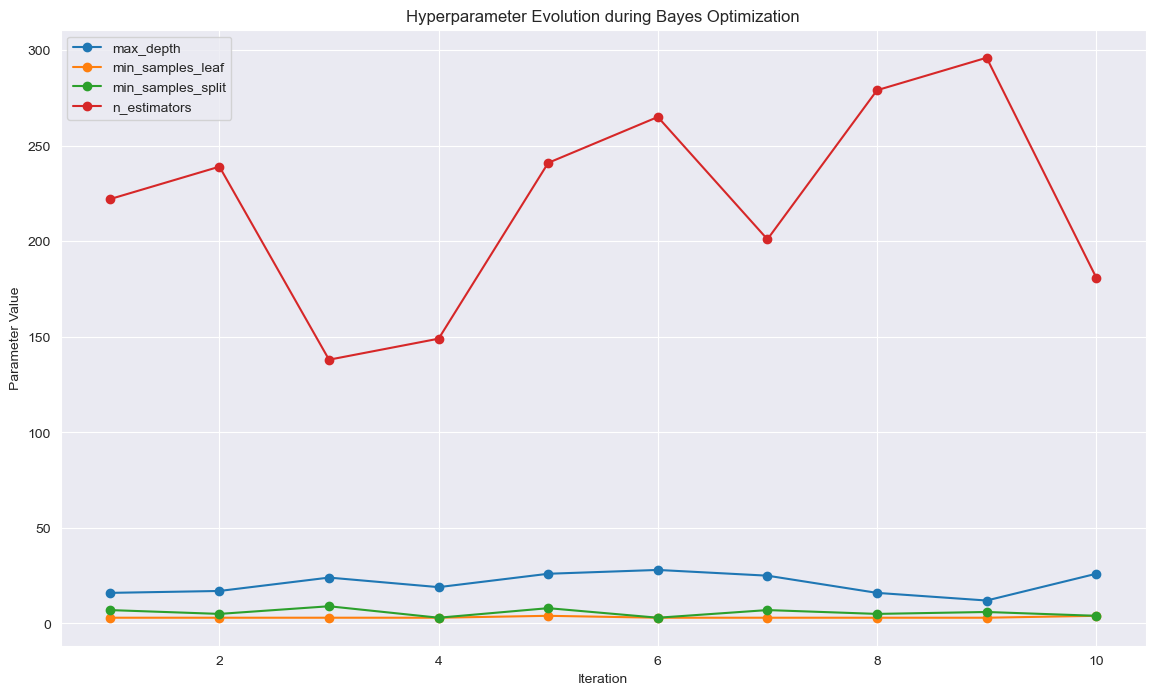

In [129]:
# 绘制数值参数的折线图
plt.figure(figsize=(14, 8))

plt.plot(iterations, max_depth_values, label='max_depth', marker='o')
plt.plot(iterations, min_samples_leaf_values, label='min_samples_leaf', marker='o')
plt.plot(iterations, min_samples_split_values, label='min_samples_split', marker='o')
plt.plot(iterations, n_estimators_values, label='n_estimators', marker='o')

plt.xlabel('Iteration')
plt.ylabel('Parameter Value')
plt.title('Hyperparameter Evolution during Bayes Optimization')
plt.legend()
plt.grid(True)
plt.show()


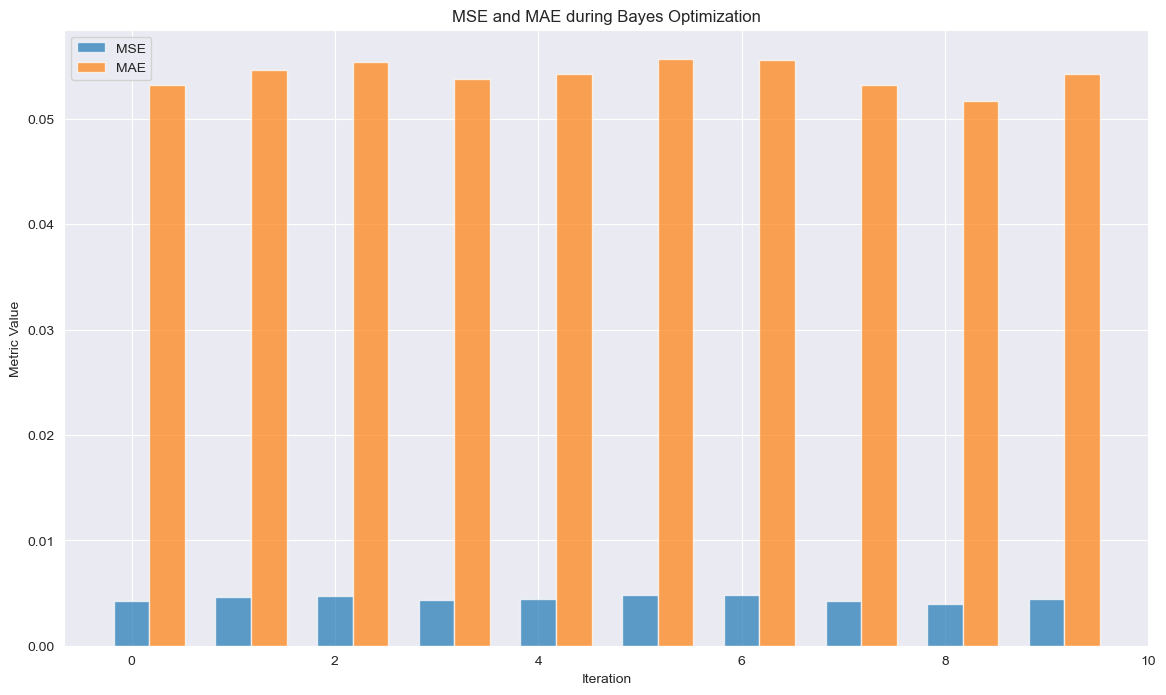

In [130]:
# 2. 绘制mse和mae的柱状图
plt.figure(figsize=(14, 8))

bar_width = 0.35
index = np.arange(len(metrics['mse']))

plt.bar(index, metrics['mse'], bar_width, label='MSE', alpha=0.7)
plt.bar(index + bar_width, metrics['mae'], bar_width, label='MAE', alpha=0.7)

plt.xlabel('Iteration')
plt.ylabel('Metric Value')
plt.title('MSE and MAE during Bayes Optimization')
plt.legend()
plt.grid(True)
plt.show()


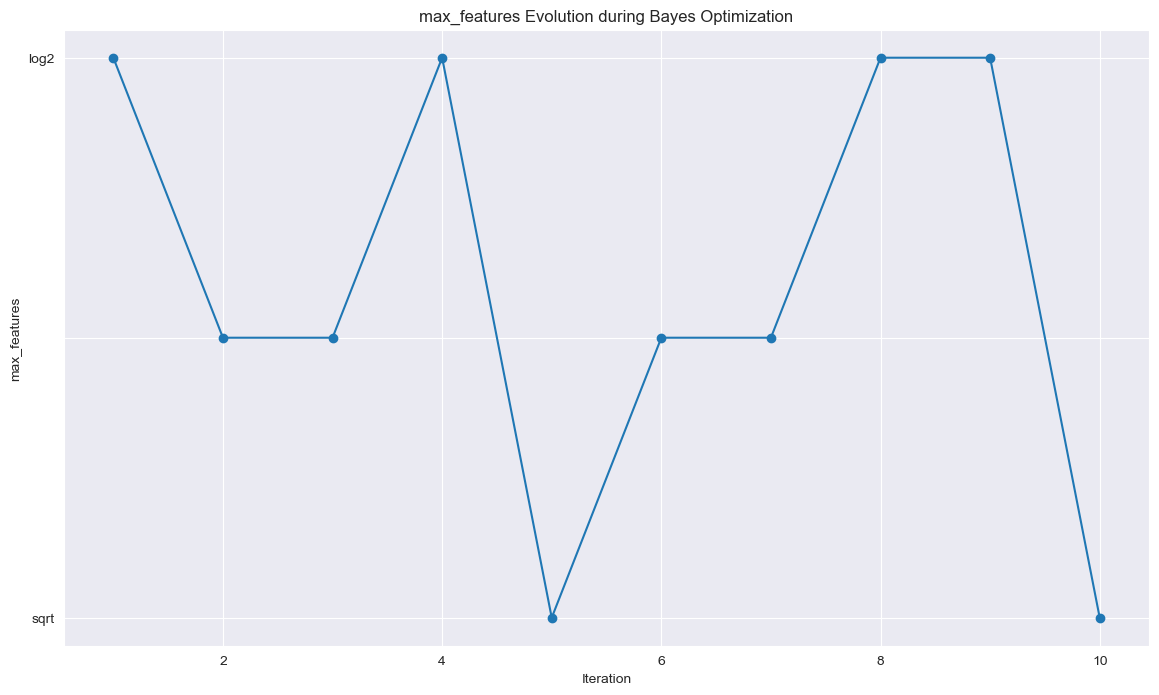

In [131]:
# 3. 非数值类型参数绘制建议：max_features
# 将类别参数转换为数字表示，然后绘制折线图

max_features_values = [params['max_features'] for params in params_list]
unique_features = list(set(max_features_values))
feature_to_num = {feature: idx for idx, feature in enumerate(unique_features)}

# 将max_features值转换为数字
max_features_numeric = [feature_to_num[feature] for feature in max_features_values]

# 绘制折线图
plt.figure(figsize=(14, 8))

plt.plot(iterations, max_features_numeric, label='max_features', marker='o')
plt.yticks(list(feature_to_num.values()), list(feature_to_num.keys()))

plt.xlabel('Iteration')
plt.ylabel('max_features')
plt.title('max_features Evolution during Bayes Optimization')
plt.grid(True)
plt.show()


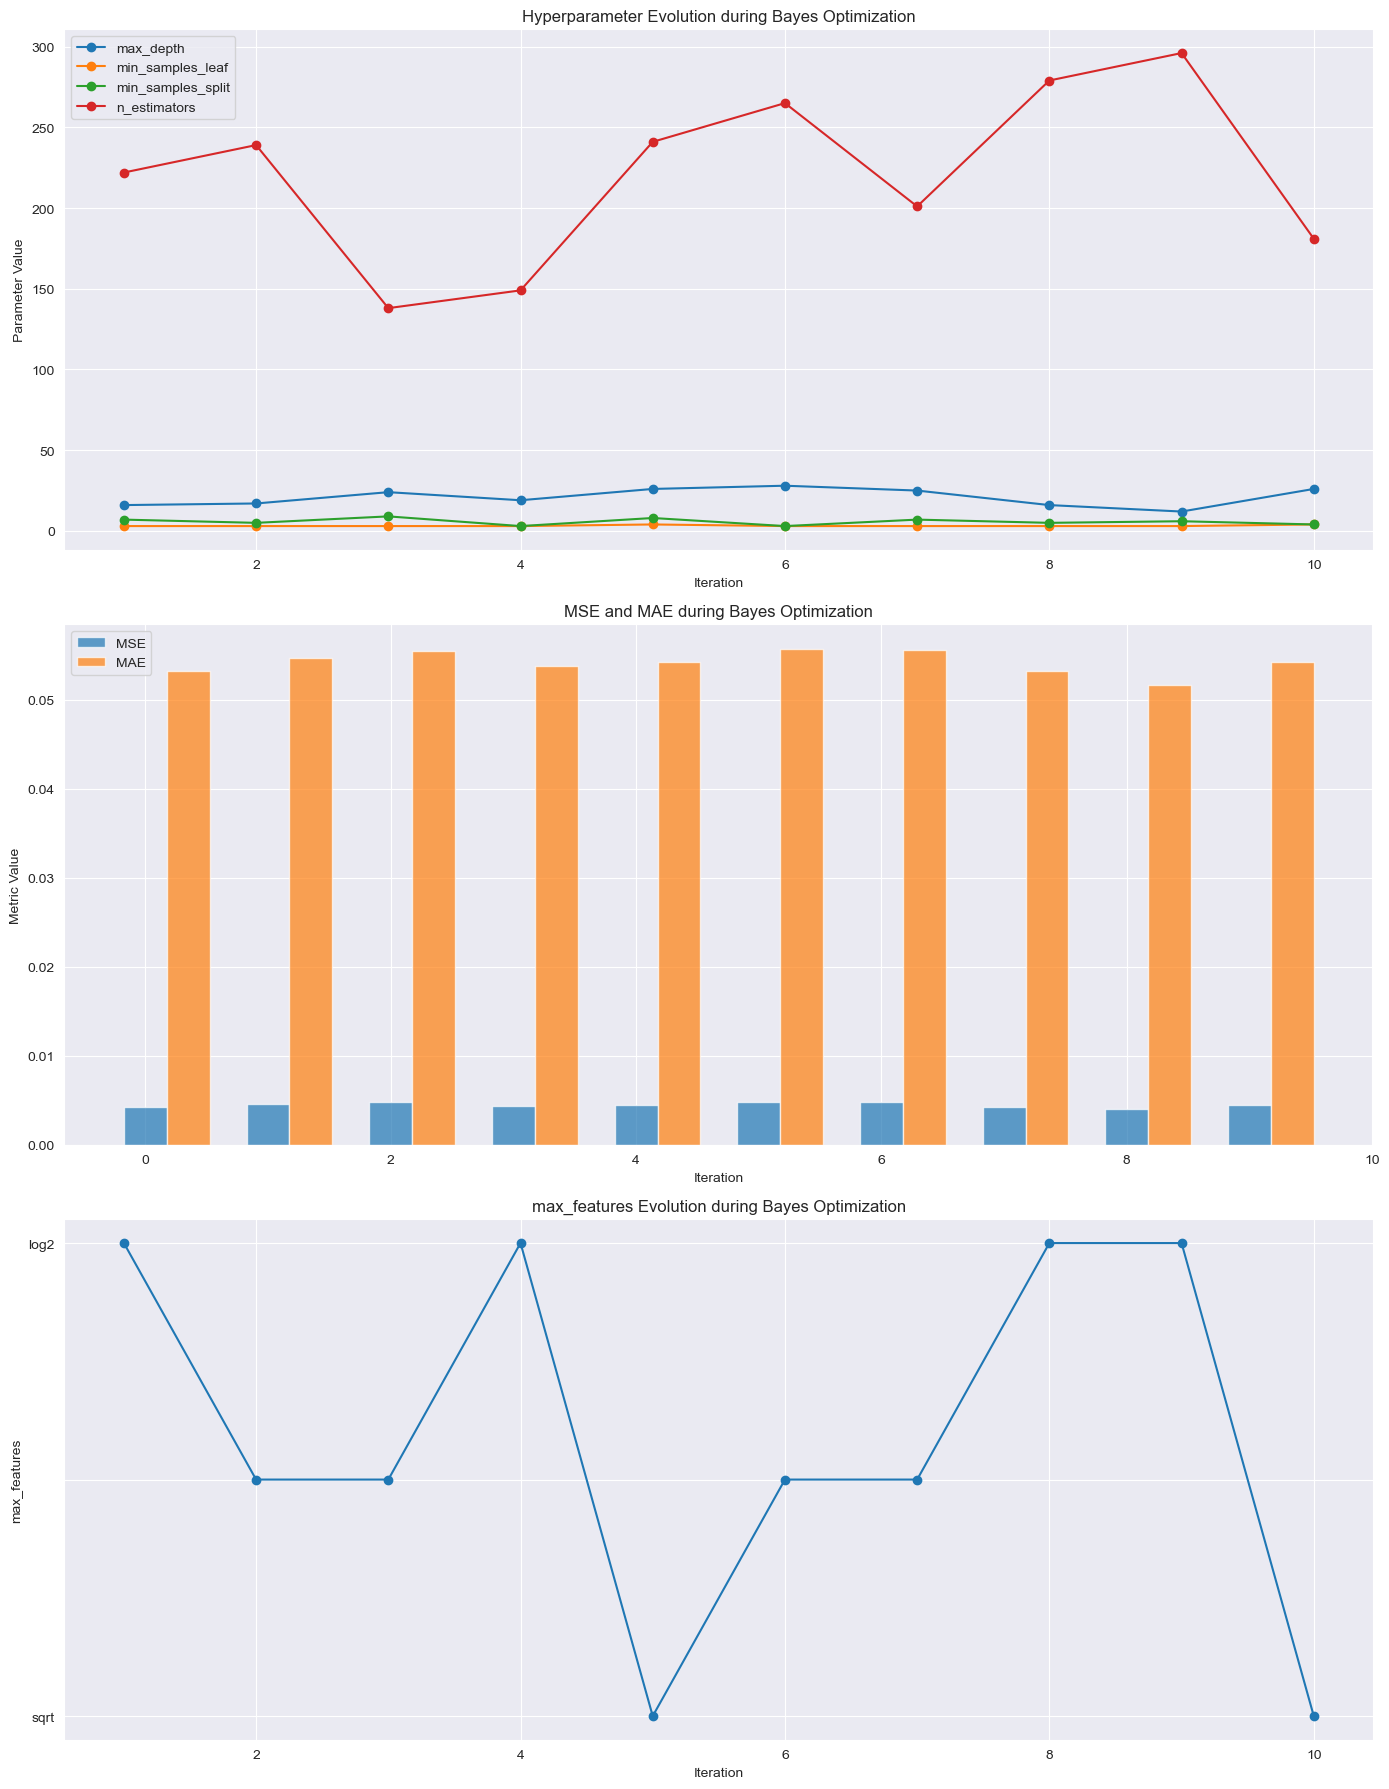

In [132]:
# 2. 准备非数值类型参数的数据
max_features_values = [params['max_features'] for params in params_list]
unique_features = list(set(max_features_values))
feature_to_num = {feature: idx for idx, feature in enumerate(unique_features)}

# 将 max_features 值转换为数字
max_features_numeric = [feature_to_num[feature] for feature in max_features_values]

# 3. 绘制图表
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# 绘制数值参数的折线图
axs[0].plot(iterations, max_depth_values, label='max_depth', marker='o')
axs[0].plot(iterations, min_samples_leaf_values, label='min_samples_leaf', marker='o')
axs[0].plot(iterations, min_samples_split_values, label='min_samples_split', marker='o')
axs[0].plot(iterations, n_estimators_values, label='n_estimators', marker='o')

axs[0].set_xlabel('Iteration')
axs[0].set_ylabel('Parameter Value')
axs[0].set_title('Hyperparameter Evolution during Bayes Optimization')
axs[0].legend()
axs[0].grid(True)

# 绘制MSE和MAE的柱状图
bar_width = 0.35
index = np.arange(len(metrics['mse']))

axs[1].bar(index, metrics['mse'], bar_width, label='MSE', alpha=0.7)
axs[1].bar(index + bar_width, metrics['mae'], bar_width, label='MAE', alpha=0.7)

axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Metric Value')
axs[1].set_title('MSE and MAE during Bayes Optimization')
axs[1].legend()
axs[1].grid(True)

# 绘制非数值类型参数的折线图
axs[2].plot(iterations, max_features_numeric, label='max_features', marker='o')
axs[2].set_yticks(list(feature_to_num.values()))
axs[2].set_yticklabels(list(feature_to_num.keys()))

axs[2].set_xlabel('Iteration')
axs[2].set_ylabel('max_features')
axs[2].set_title('max_features Evolution during Bayes Optimization')
axs[2].grid(True)

# 调整布局
plt.tight_layout()
plt.show()


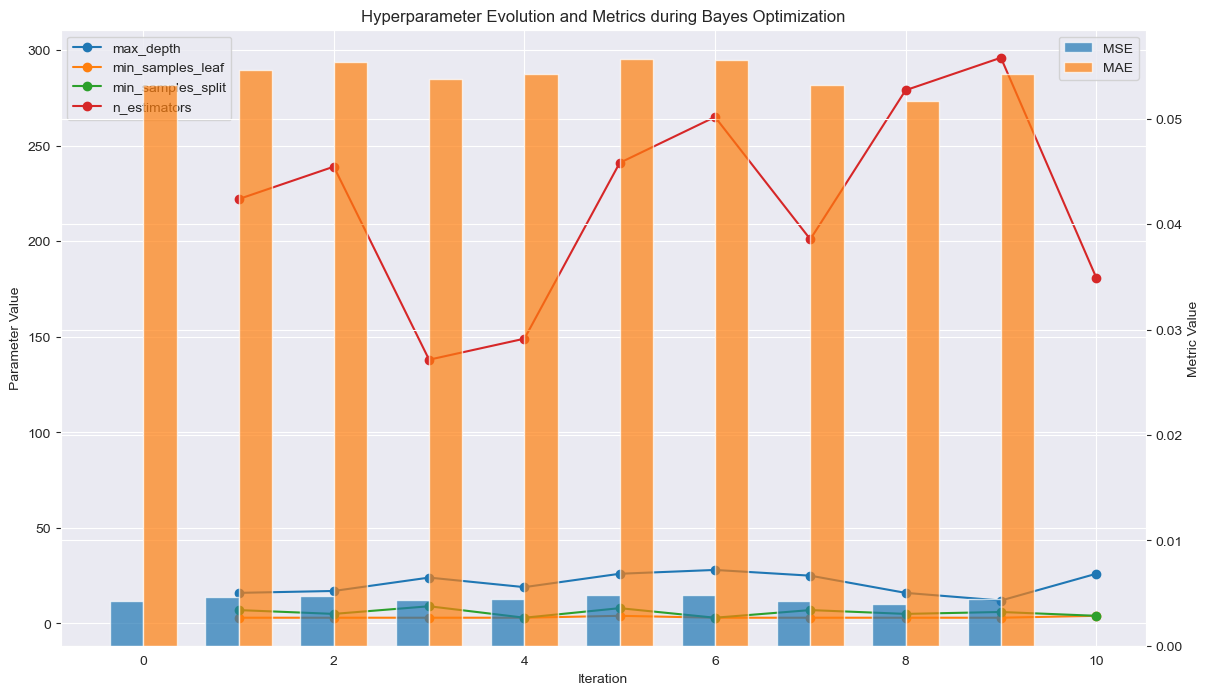

In [133]:
# 2. 创建图表
fig, ax1 = plt.subplots(figsize=(14, 8))

# 绘制数值参数的折线图（左侧y轴）
ax1.plot(iterations, max_depth_values, label='max_depth', marker='o')
ax1.plot(iterations, min_samples_leaf_values, label='min_samples_leaf', marker='o')
ax1.plot(iterations, min_samples_split_values, label='min_samples_split', marker='o')
ax1.plot(iterations, n_estimators_values, label='n_estimators', marker='o')

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Parameter Value')
ax1.set_title('Hyperparameter Evolution and Metrics during Bayes Optimization')
ax1.legend(loc='upper left')
ax1.grid(True)

# 创建右侧的y轴，用于绘制柱状图
ax2 = ax1.twinx()

# 绘制MSE和MAE的柱状图（右侧y轴）
bar_width = 0.35
index = np.arange(len(metrics['mse']))

ax2.bar(index - bar_width/2, metrics['mse'], bar_width, label='MSE', alpha=0.7)
ax2.bar(index + bar_width/2, metrics['mae'], bar_width, label='MAE', alpha=0.7)

ax2.set_ylabel('Metric Value')
ax2.legend(loc='upper right')

plt.show()

In [143]:
best_metrics_results = []

In [144]:
# 使用最佳参数进行后续三次训练
for i in range(1, 4):
    print(f"Applying optimized parameters to model {i+1}/4")

    # 设置模型参数为最佳参数
    model.set_params(**best_params)

    # 进行模型训练
    model.fit(X, Y[:, i])

    # 进行预测并计算评估指标
    y_pred = model.predict(X)
    mse = mean_squared_error(Y[:, i], y_pred)
    r2 = r2_score(Y[:, i], y_pred)
    mae = mean_absolute_error(Y[:, i], y_pred)

    # 将结果存储
    result = {
        'mse_scores': [mse],
        'r2_scores': [r2],
        'mae_scores': [mae],
    }
    # all_results.append((result, best_params))
    best_metrics_results.append(result)

    # 获取特征重要性
    importance_matrix[:, i] = model.feature_importances_

Applying optimized parameters to model 2/4
Applying optimized parameters to model 3/4
Applying optimized parameters to model 4/4


In [145]:
best_metrics_results

[{'mse_scores': [0.001937329248511584],
  'r2_scores': [0.35286670976189094],
  'mae_scores': [0.036020582682971945]},
 {'mse_scores': [0.14573876425799276],
  'r2_scores': [0.2675451675753667],
  'mae_scores': [0.3109452123075583]},
 {'mse_scores': [9.389884055701877e-05],
  'r2_scores': [0.44927250563182974],
  'mae_scores': [0.007887752511841761]}]

In [146]:
# 1. 拼接数据
all_mse_scores = [best_result_1[0]['mse']] + [result['mse_scores'][0] for result in best_metrics_results]
all_r2_scores = [best_result_1[0]['r2']] + [result['r2_scores'][0] for result in best_metrics_results]
all_mae_scores = [best_result_1[0]['mae']] + [result['mae_scores'][0] for result in best_metrics_results]


In [147]:
all_mse_scores

[0.003998004621441605,
 0.001937329248511584,
 0.14573876425799276,
 9.389884055701877e-05]

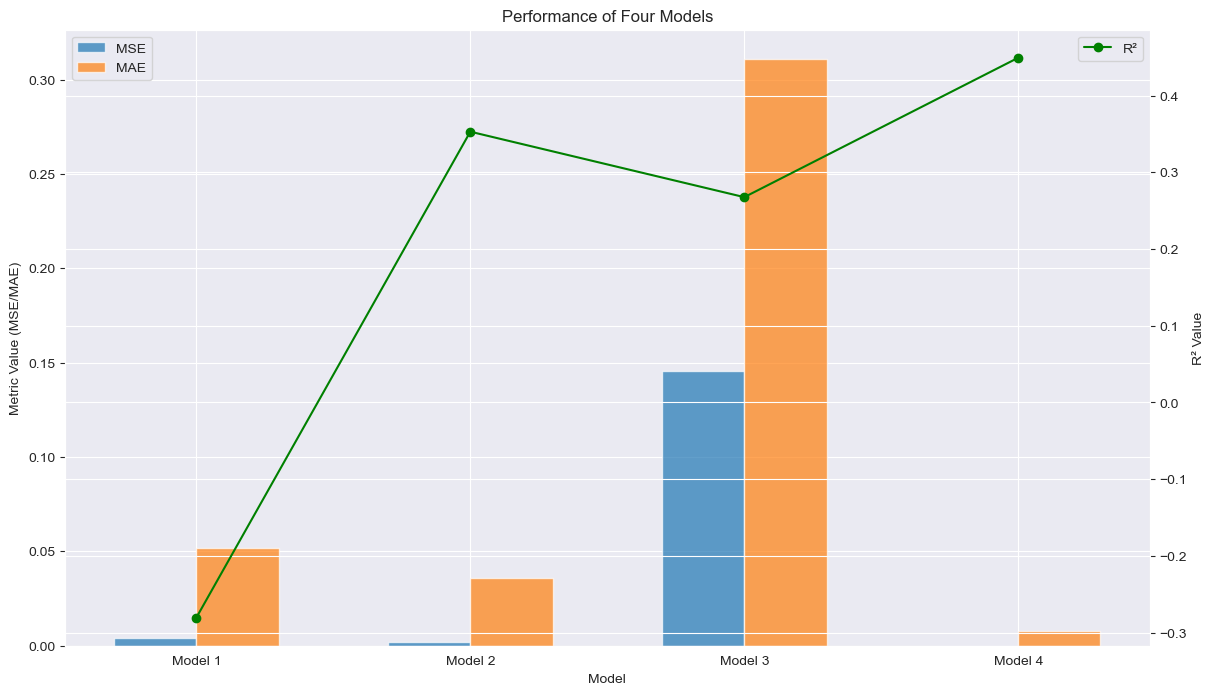

In [148]:
# 2. 绘制图表
fig, ax1 = plt.subplots(figsize=(14, 8))

iterations = np.arange(1, 5)  # 4个模型的编号

# 绘制MSE和MAE的柱状图（左侧y轴）
bar_width = 0.3

ax1.bar(iterations - bar_width/2, all_mse_scores, bar_width, label='MSE', alpha=0.7)
ax1.bar(iterations + bar_width/2, all_mae_scores, bar_width, label='MAE', alpha=0.7)

ax1.set_xlabel('Model')
ax1.set_ylabel('Metric Value (MSE/MAE)')
ax1.set_title('Performance of Four Models')
ax1.legend(loc='upper left')
ax1.grid(True)

# 创建右侧的y轴，用于绘制R²的折线图
ax2 = ax1.twinx()

ax2.plot(iterations, all_r2_scores, label='R²', marker='o', color='green')

ax2.set_ylabel('R² Value')
ax2.legend(loc='upper right')

plt.xticks(iterations, [f'Model {i}' for i in iterations])  # 设置x轴刻度标签为Model 1, Model 2, Model 3, Model 4
plt.show()

In [149]:
importance_matrix

array([[0.23082121, 0.1583306 , 0.19610664, 0.12452763],
       [0.00196067, 0.00083156, 0.0012421 , 0.0006377 ],
       [0.14184369, 0.15898616, 0.15485559, 0.13421823],
       [0.14357999, 0.15617873, 0.15206536, 0.12742612],
       [0.48179444, 0.52567294, 0.49573032, 0.61319032]])

In [150]:
# 将特征重要性结果转化为DataFrame
importance_df = pd.DataFrame(importance_matrix,
                             columns=['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)'],
                             index=['建筑物高度', '建筑物密度', '树冠高度', '叶面积指数', '地形数据'])

print("Feature Importances:")
importance_df

Feature Importances:


,Dew Point (°C),Air Temperature (°C),Relative Humidity (%),Wind Speed (kn)
建筑物高度,0.230821,0.158331,0.196107,0.124528
建筑物密度,0.001961,0.000832,0.001242,0.000638
树冠高度,0.141844,0.158986,0.154856,0.134218
叶面积指数,0.143580,0.156179,0.152065,0.127426
地形数据,0.481794,0.525673,0.495730,0.613190


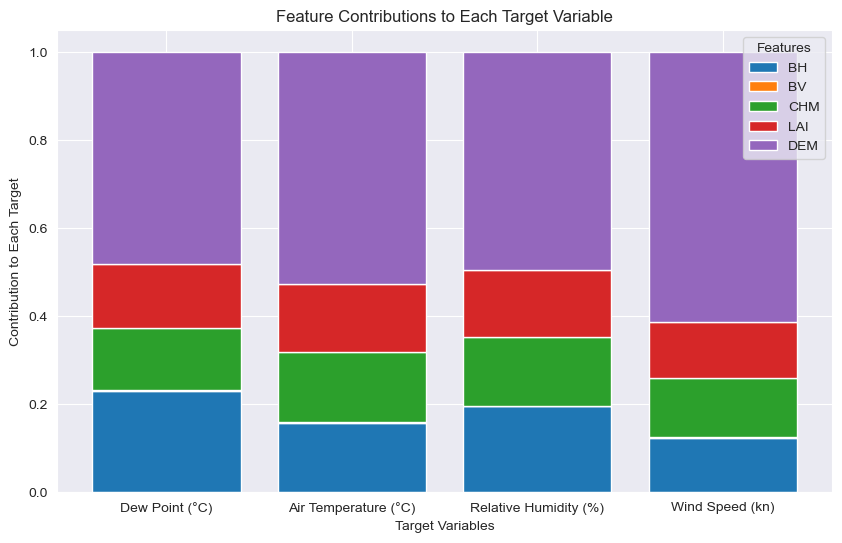

In [154]:
# 特征名称
feature_names = ['BH', 'BV', 'CHM', 'LAI', 'DEM']

# 目标变量名称
target_names = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']

# 绘制堆积柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 每一列表示一个目标变量的贡献
for i, row in enumerate(importance_matrix):
    ax.bar(target_names, row, bottom=np.sum(importance_matrix[:i], axis=0), label=feature_names[i])

ax.set_xlabel('Target Variables')
ax.set_ylabel('Contribution to Each Target')
ax.set_title('Feature Contributions to Each Target Variable')
ax.legend(title="Features")
plt.show()

# 每层都进行超参数调整

In [32]:
X.shape, Y.shape

((160000, 5), (160000, 4))

In [33]:
# 对每一层Y都进行超参数优化，并记录相应数据

best_params_list = []
best_metrics_list = []
importance_matrices = np.zeros((X_reshaped.shape[1], Y_reshaped.shape[1]))


In [40]:
def get_best_metrics(bayes_search, best_params):
    """获取最佳参数对应的评价指标"""
    best_iteration = None
    for idx, params in enumerate(bayes_search.cv_results_['params']):
        if params == best_params:
            best_iteration = idx
            break
    if best_iteration is not None:
        return {
            'mse': -bayes_search.cv_results_['mean_test_mse'][best_iteration],
            'r2': bayes_search.cv_results_['mean_test_r2'][best_iteration],
            'mae': -bayes_search.cv_results_['mean_test_mae'][best_iteration],
        }
    return None

In [41]:
def TrainRandomForestModel(X, Y, index):
    print(f"Optimizing model for Y[:, {index}]")
    
    # 定义进度条
    progress_callback = TqdmProgressCallback(total_iterations=n_iter, model_idx=index)

    # 执行贝叶斯优化
    print(f"----------Start optimizing model for Y[:, {index}]----------")
    bayes_search.fit(X, Y[:, index], callback=[progress_callback])
    print(f"----------Finish optimizing model for Y[:, {index}]----------")

    # 获取最佳参数
    best_params = bayes_search.best_params_
    best_params_list.append(best_params)

    # 计算最佳参数对应的评价指标
    best_metrics = get_best_metrics(bayes_search, best_params)
    if best_metrics:
        best_metrics_list.append(best_metrics)

    importance_matrices[:, index] = bayes_search.best_estimator_.feature_importances_
    progress_callback.close()


In [42]:
TrainRandomForestModel(X, Y, 0)

Optimizing model for Y[:, 0]


Optimizing Model 1:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 0]----------


Optimizing Model 1: 100%|██████████| 10/10 [11:08<00:00, 66.81s/it]

----------Finish optimizing model for Y[:, 0]----------


In [43]:
TrainRandomForestModel(X, Y, 1)

Optimizing model for Y[:, 1]


Optimizing Model 2:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 1]----------


Optimizing Model 2: 100%|██████████| 10/10 [13:51<00:00, 83.17s/it]

----------Finish optimizing model for Y[:, 1]----------


In [44]:
TrainRandomForestModel(X, Y, 2)

Optimizing model for Y[:, 2]


Optimizing Model 3:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 2]----------


Optimizing Model 3: 100%|██████████| 10/10 [11:01<00:00, 66.19s/it]

----------Finish optimizing model for Y[:, 2]----------


In [45]:
TrainRandomForestModel(X, Y, 3)

Optimizing model for Y[:, 3]


Optimizing Model 4:   0%|          | 0/10 [00:00<?, ?it/s]

----------Start optimizing model for Y[:, 3]----------


Optimizing Model 4: 100%|██████████| 10/10 [12:25<00:00, 74.52s/it]

----------Finish optimizing model for Y[:, 3]----------


In [46]:
# 保存结果
import pickle

with open('Results/RF_HP_best_params_list.pkl', 'wb') as f:
    pickle.dump(best_params_list, f)
    
with open('Results/RF_HP_best_metrics_list.pkl', 'wb') as f:
    pickle.dump(best_metrics_list, f)
    
with open('Results/RF_HP_importance_matrices.pkl', 'wb') as f:
    pickle.dump(importance_matrices, f)
    
print("Results saved successfully!")


Results saved successfully!


In [47]:
# 打印每一层Y的最佳参数和评价指标
for i, (params, metrics) in enumerate(zip(best_params_list, best_metrics_list)):
    print(f"Best parameters for Y[:, {i}]: {params}")
    print(f"Metrics: MSE={metrics['mse']}, R²={metrics['r2']}, MAE={metrics['mae']}")


Best parameters for Y[:, 0]: OrderedDict([('max_depth', 12), ('max_features', 'sqrt'), ('min_samples_leaf', 4), ('min_samples_split', 9), ('n_estimators', 137)])
Metrics: MSE=0.003987494919814605, R²=-0.2772583334579891, MAE=0.05159579169574154
Best parameters for Y[:, 1]: OrderedDict([('max_depth', 11), ('max_features', 'log2'), ('min_samples_leaf', 2), ('min_samples_split', 9), ('n_estimators', 233)])
Metrics: MSE=0.002962649253345114, R²=-0.0863726690644095, MAE=0.04532045958176557
Best parameters for Y[:, 2]: OrderedDict([('max_depth', 14), ('max_features', 'log2'), ('min_samples_leaf', 1), ('min_samples_split', 9), ('n_estimators', 180)])
Metrics: MSE=0.23698498126658157, R²=-0.19820508435567383, MAE=0.39906460405794403
Best parameters for Y[:, 3]: OrderedDict([('max_depth', 12), ('max_features', 'sqrt'), ('min_samples_leaf', 4), ('min_samples_split', 5), ('n_estimators', 290)])
Metrics: MSE=0.00015057409942853233, R²=-0.10813702120505882, MAE=0.010249714595256572


In [52]:
best_params_list

[OrderedDict([('max_depth', 12),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 4),
              ('min_samples_split', 9),
              ('n_estimators', 137)]),
 OrderedDict([('max_depth', 11),
              ('max_features', 'log2'),
              ('min_samples_leaf', 2),
              ('min_samples_split', 9),
              ('n_estimators', 233)]),
 OrderedDict([('max_depth', 14),
              ('max_features', 'log2'),
              ('min_samples_leaf', 1),
              ('min_samples_split', 9),
              ('n_estimators', 180)]),
 OrderedDict([('max_depth', 12),
              ('max_features', 'sqrt'),
              ('min_samples_leaf', 4),
              ('min_samples_split', 5),
              ('n_estimators', 290)])]

In [53]:
best_metrics_list

[{'mse': 0.003987494919814605,
  'r2': -0.2772583334579891,
  'mae': 0.05159579169574154},
 {'mse': 0.002962649253345114,
  'r2': -0.0863726690644095,
  'mae': 0.04532045958176557},
 {'mse': 0.23698498126658157,
  'r2': -0.19820508435567383,
  'mae': 0.39906460405794403},
 {'mse': 0.00015057409942853233,
  'r2': -0.10813702120505882,
  'mae': 0.010249714595256572}]

In [56]:
mse_scores = [metrics['mse'] for metrics in best_metrics_list]
r2_scores = [metrics['r2'] for metrics in best_metrics_list]
mae_scores = [metrics['mae'] for metrics in best_metrics_list]

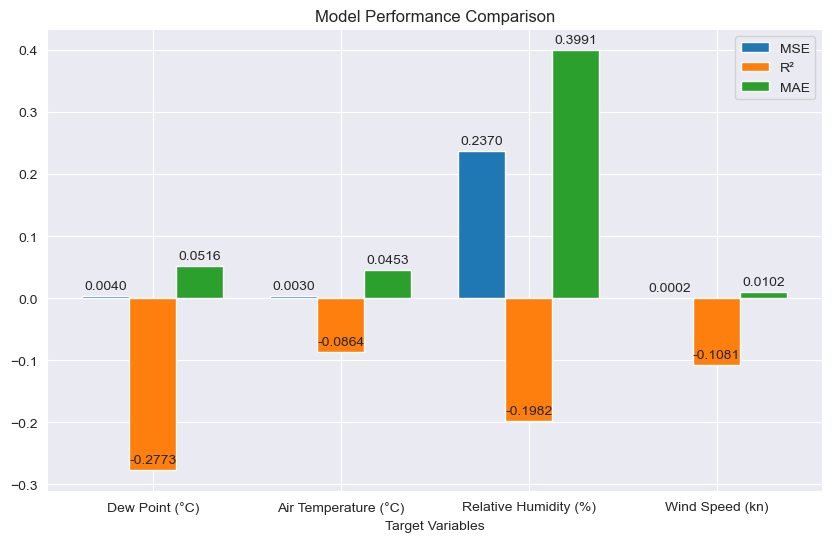

In [57]:
labels = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']

x = np.arange(len(labels))  # 标签的位置
width = 0.25  # 柱状图的宽度

fig, ax = plt.subplots(figsize=(10, 6))

# 绘制柱状图
rects1 = ax.bar(x - width, mse_scores, width, label='MSE')
rects2 = ax.bar(x, r2_scores, width, label='R²')
rects3 = ax.bar(x + width, mae_scores, width, label='MAE')

# 添加文本标签
ax.set_xlabel('Target Variables')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# 显示数值
def autolabel(rects):
    """在每个条形图顶部显示数值"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

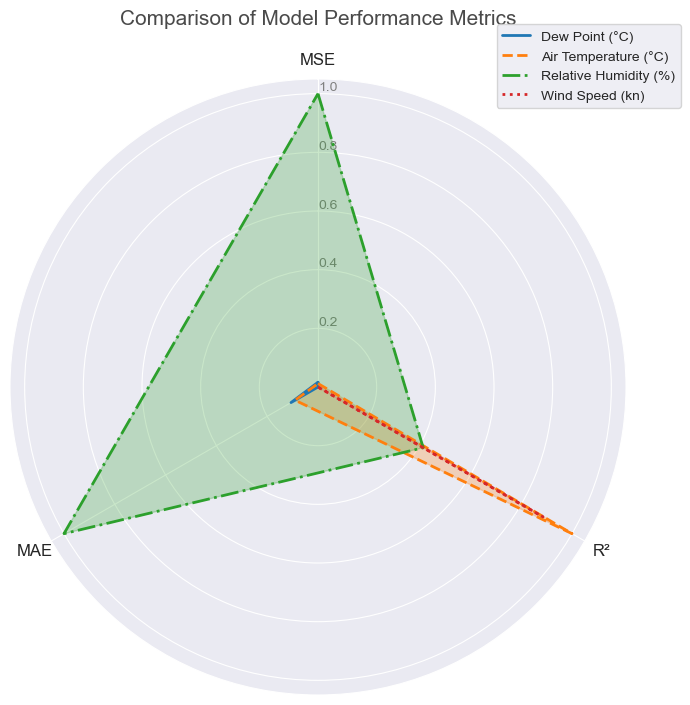

In [64]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# 数据准备
categories = ['MSE', 'R²', 'MAE']
num_vars = len(categories)

# 数据标准化
mse_scores_normalized = (mse_scores - np.min(mse_scores)) / (np.max(mse_scores) - np.min(mse_scores))
r2_scores_normalized = (r2_scores - np.min(r2_scores)) / (np.max(r2_scores) - np.min(r2_scores))
mae_scores_normalized = (mae_scores - np.min(mae_scores)) / (np.max(mae_scores) - np.min(mae_scores))

data = [
    [mse_scores_normalized[0], r2_scores_normalized[0], mae_scores_normalized[0]],
    [mse_scores_normalized[1], r2_scores_normalized[1], mae_scores_normalized[1]],
    [mse_scores_normalized[2], r2_scores_normalized[2], mae_scores_normalized[2]],
    [mse_scores_normalized[3], r2_scores_normalized[3], mae_scores_normalized[3]],
]

labels = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']

# 角度和布局
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 将第一个角度加到最后，用于闭合图形

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 自定义颜色和线条样式
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']

# 绘制每一个雷达图
for i in range(len(labels)):
    values = data[i] + data[i][:1]  # 闭合图形
    ax.plot(angles, values, linewidth=2, linestyle=linestyles[i], color=colors[i], label=labels[i])
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# 调整标题和标签字体
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], categories, fontsize=12)
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color="grey", size=10)
plt.title('Comparison of Model Performance Metrics', size=15, color='#4A4A4A', pad=20)

# 设置图例
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)

# 显示图表
plt.show()


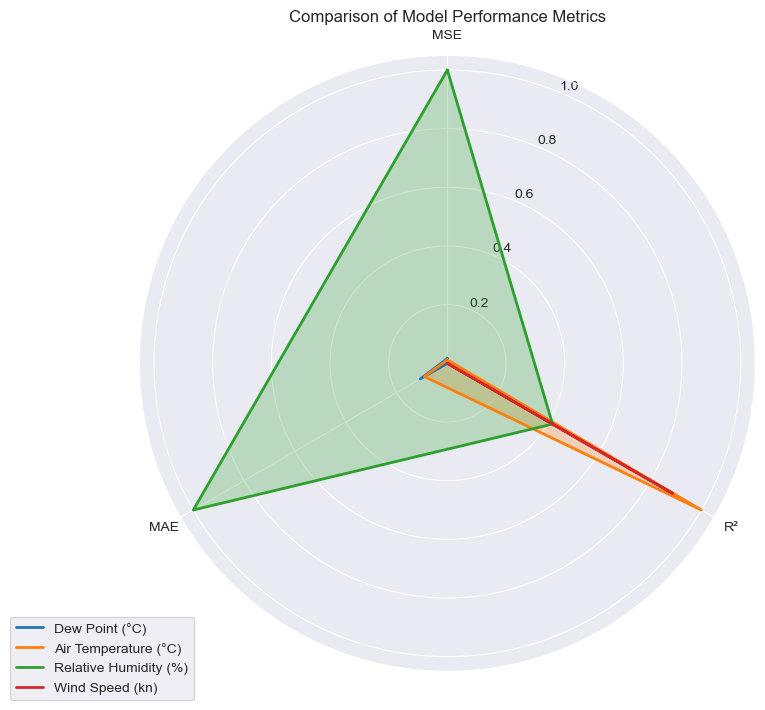

In [61]:
from math import pi
import matplotlib.pyplot as plt

# 数据准备：确保每个列表包含与目标变量数量相对应的项
categories = ['MSE', 'R²', 'MAE']
num_vars = len(categories)

# 这里我们假设数据已经标准化为 [0, 1] 区间内，以便在雷达图上绘制
mse_scores_normalized = (mse_scores - np.min(mse_scores)) / (np.max(mse_scores) - np.min(mse_scores))
r2_scores_normalized = (r2_scores - np.min(r2_scores)) / (np.max(r2_scores) - np.min(r2_scores))
mae_scores_normalized = (mae_scores - np.min(mae_scores)) / (np.max(mae_scores) - np.min(mae_scores))

data = [
    [mse_scores_normalized[0], r2_scores_normalized[0], mae_scores_normalized[0]],
    [mse_scores_normalized[1], r2_scores_normalized[1], mae_scores_normalized[1]],
    [mse_scores_normalized[2], r2_scores_normalized[2], mae_scores_normalized[2]],
    [mse_scores_normalized[3], r2_scores_normalized[3], mae_scores_normalized[3]],
]

labels = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']

# 角度和布局
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 将第一个角度加到最后，用于闭合图形

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制每一个雷达图
for i in range(len(labels)):
    values = data[i] + data[i][:1]  # 闭合图形
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=labels[i])
    ax.fill(angles, values, alpha=0.25)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], categories)

plt.title('Comparison of Model Performance Metrics')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


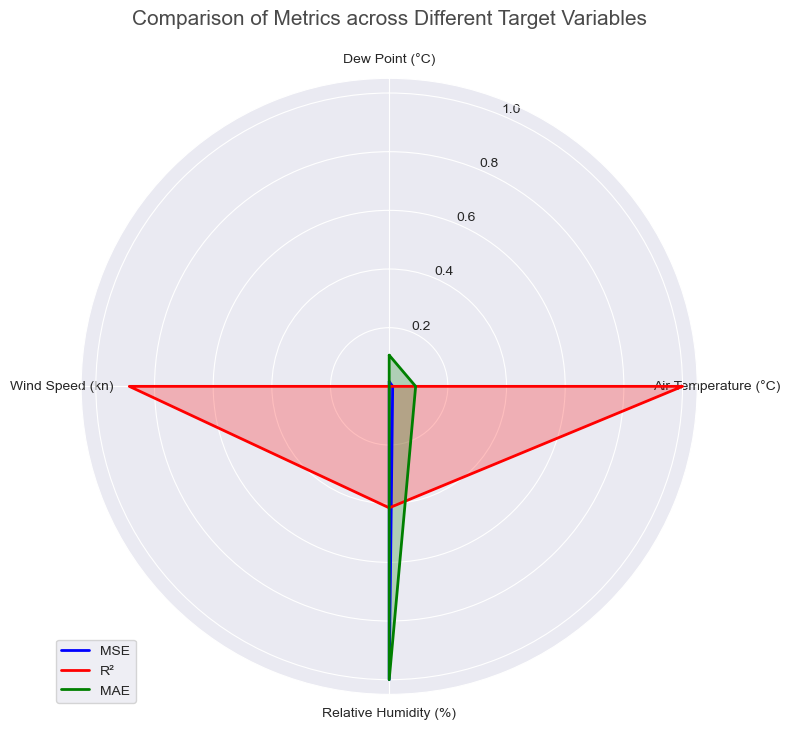

In [67]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# 数据准备
categories = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']
num_vars = len(categories)

# 数据标准化
mse_scores_normalized = (mse_scores - np.min(mse_scores)) / (np.max(mse_scores) - np.min(mse_scores))
r2_scores_normalized = (r2_scores - np.min(r2_scores)) / (np.max(r2_scores) - np.min(r2_scores))
mae_scores_normalized = (mae_scores - np.min(mae_scores)) / (np.max(mae_scores) - np.min(mae_scores))

data = [
    mse_scores_normalized.tolist(),
    r2_scores_normalized.tolist(),
    mae_scores_normalized.tolist()
]

# 使每个数据循环闭合
for i in range(len(data)):
    data[i] += data[i][:1]

angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# 开始绘制雷达图
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 添加每一条数据到雷达图上
labels = ['MSE', 'R²', 'MAE']
colors = ['b', 'r', 'g']

for i in range(len(data)):
    ax.plot(angles, data[i], linewidth=2, linestyle='solid', label=labels[i], color=colors[i])
    ax.fill(angles, data[i], color=colors[i], alpha=0.25)

# 添加特征名称到角度
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], categories)

# 添加标题和图例
plt.title('Comparison of Metrics across Different Target Variables', size=15, color='#4A4A4A', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)

plt.show()


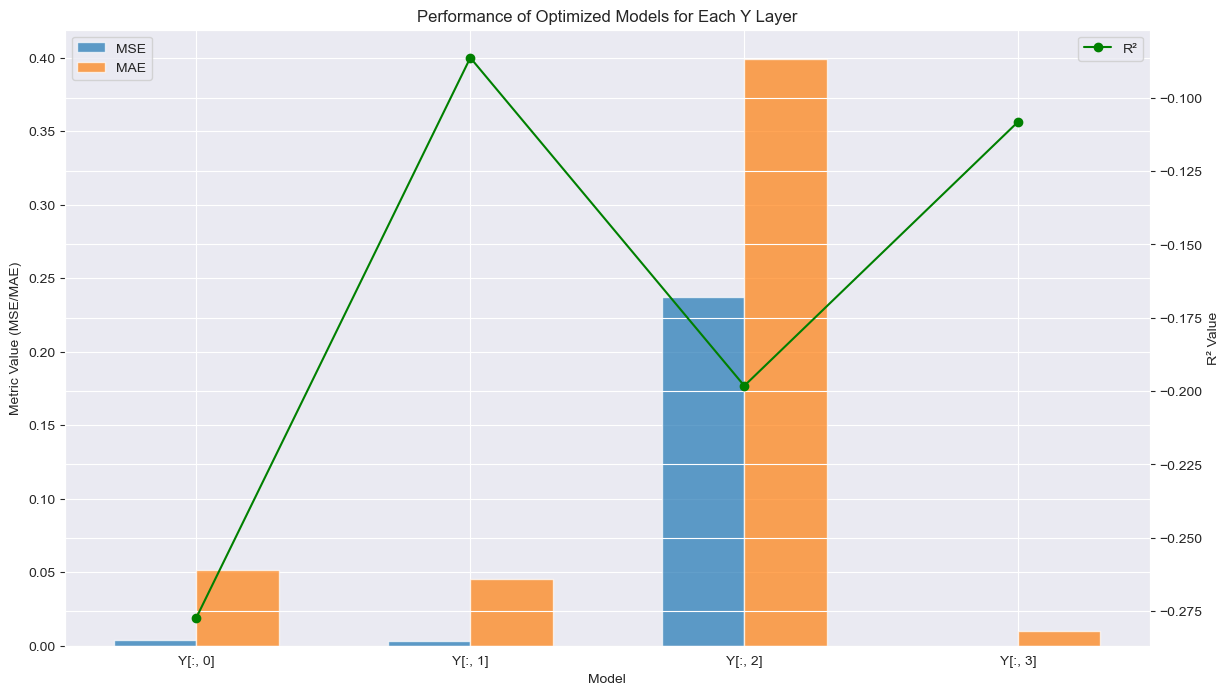

In [50]:
# 绘制每层Y的评价指标柱状图
all_mse_scores = [metrics['mse'] for metrics in best_metrics_list]
all_r2_scores = [metrics['r2'] for metrics in best_metrics_list]
all_mae_scores = [metrics['mae'] for metrics in best_metrics_list]

fig, ax1 = plt.subplots(figsize=(14, 8))

iterations = np.arange(1, Y.shape[1] + 1)  # 根据Y的列数生成模型编号

# 绘制MSE和MAE的柱状图（左侧y轴）
bar_width = 0.3

ax1.bar(iterations - bar_width/2, all_mse_scores, bar_width, label='MSE', alpha=0.7)
ax1.bar(iterations + bar_width/2, all_mae_scores, bar_width, label='MAE', alpha=0.7)

ax1.set_xlabel('Model')
ax1.set_ylabel('Metric Value (MSE/MAE)')
ax1.set_title('Performance of Optimized Models for Each Y Layer')
ax1.legend(loc='upper left')
ax1.grid(True)

# 创建右侧的y轴，用于绘制R²的折线图
ax2 = ax1.twinx()

ax2.plot(iterations, all_r2_scores, label='R²', marker='o', color='green')

ax2.set_ylabel('R² Value')
ax2.legend(loc='upper right')

plt.xticks(iterations, [f'Y[:, {i}]' for i in range(Y.shape[1])])  # 设置x轴刻度标签为Y[:, 0], Y[:, 1], ...
plt.show()


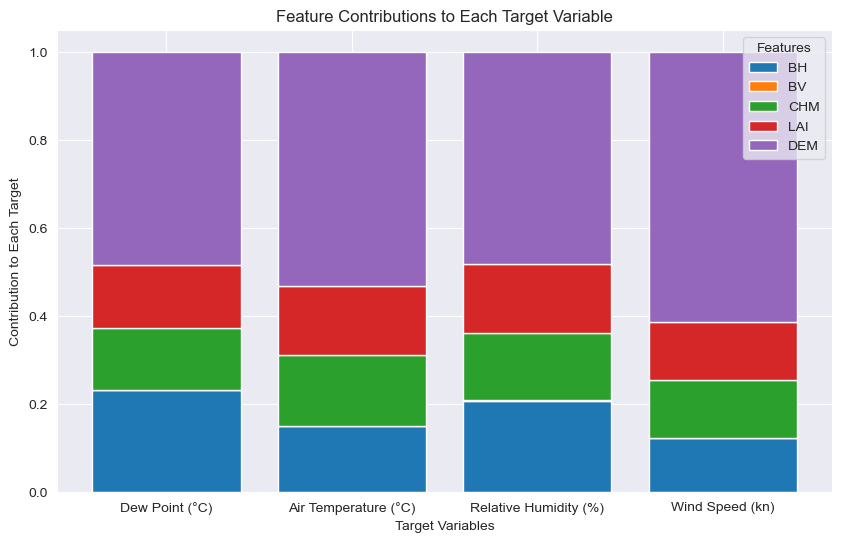

In [62]:
# 特征名称
feature_names = ['BH', 'BV', 'CHM', 'LAI', 'DEM']

# 目标变量名称
target_names = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']

# 绘制堆积柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 每一列表示一个目标变量的贡献
for i, row in enumerate(importance_matrices):
    ax.bar(target_names, row, bottom=np.sum(importance_matrices[:i], axis=0), label=feature_names[i])

ax.set_xlabel('Target Variables')
ax.set_ylabel('Contribution to Each Target')
ax.set_title('Feature Contributions to Each Target Variable')
ax.legend(title="Features")
plt.show()

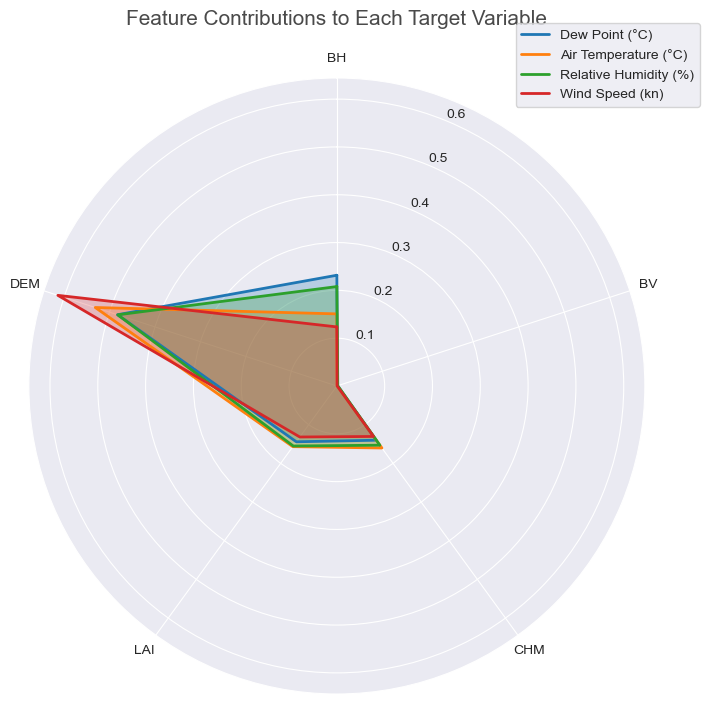

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# 特征名称
feature_names = ['BH', 'BV', 'CHM', 'LAI', 'DEM']

# 目标变量名称
target_names = ['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)']

# 雷达图的角度计算
num_vars = len(feature_names)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # 闭合雷达图

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# 绘制每个目标变量的雷达图
for i in range(len(target_names)):
    values = importance_matrices[:, i].tolist()
    values += values[:1]  # 闭合图形

    ax.plot(angles, values, linewidth=2, linestyle='solid', label=target_names[i])
    ax.fill(angles, values, alpha=0.25)

# 添加特征名称到角度
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([angle * 180/pi for angle in angles[:-1]], feature_names)

# 添加标题和图例
plt.title('Feature Contributions to Each Target Variable', size=15, color='#4A4A4A', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10)

plt.show()


In [63]:
# 将特征重要性结果转化为DataFrame
importance_df = pd.DataFrame(importance_matrices,
                             columns=['Dew Point (°C)', 'Air Temperature (°C)', 'Relative Humidity (%)', 'Wind Speed (kn)'],
                             index=['建筑物高度', '建筑物密度', '树冠高度', '叶面积指数', '地形数据'])

print("Feature Importances:")
importance_df


Feature Importances:


,Dew Point (°C),Air Temperature (°C),Relative Humidity (%),Wind Speed (kn)
建筑物高度,0.231674,0.150826,0.207952,0.123577
建筑物密度,0.001510,0.000768,0.002028,0.000567
树冠高度,0.140163,0.160293,0.153096,0.130447
叶面积指数,0.144216,0.156808,0.155117,0.131862
地形数据,0.482437,0.531305,0.481807,0.613548


In [ ]:
# import matplotlib.pyplot as plt
# 
# # 定义要绘制的超参数名称
# param_names = list(search_space.keys())
# colors = ['r', 'g', 'b', 'm']  # 4个模型的颜色
# 
# # 遍历每个超参数
# for param_name in param_names:
#     plt.figure(figsize=(10, 6))
# 
#     # 对于每个模型，获取其参数历史，并绘制在同一张图上
#     for i in range(4):
#         # 获取当前模型对应的参数历史
#         params_history = []
#         for best_index in range(len(all_results[i][0]['mse_scores'])):
#             params_history.append(bayes_search.cv_results_['params'][best_index])
# 
#         param_values = [params[param_name] for params in params_history]
# 
#         if isinstance(search_space[param_name], Categorical):
#             # 如果超参数是类别类型，绘制类别标签
#             unique_categories = list(set(param_values))
#             category_to_num = {category: num for num, category in enumerate(unique_categories)}
#             num_values = [category_to_num[val] for val in param_values]
#             plt.plot(range(len(num_values)), num_values, marker='o', color=colors[i], label=f'Model {i+1}')
#             plt.yticks(list(category_to_num.values()), list(category_to_num.keys()))
#         else:
#             # 如果是数值类型，直接绘制
#             plt.plot(range(len(param_values)), param_values, marker='o', color=colors[i], label=f'Model {i+1}')
# 
#     plt.title(f'{param_name} evolution during Bayes Optimization')
#     plt.xlabel('Iteration')
#     plt.ylabel(param_name)
#     plt.legend()  # 显示图例
#     plt.grid(True)
#     plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# 
# # 定义评估指标和对应的键
# metrics = ['MSE', 'R²', 'MAE']
# metric_keys = ['mse_scores', 'r2_scores', 'mae_scores']
# 
# # 创建一个包含多个子图的图表
# fig, axs = plt.subplots(len(metrics), 1, figsize=(14, 8 * len(metrics)))
# 
# # 遍历每个评估指标并绘制子图
# for idx, (metric_name, metric_key) in enumerate(zip(metrics, metric_keys)):
#     for i, (result, _) in enumerate(all_results):
#         axs[idx].plot(range(len(result[metric_key])), result[metric_key], label=f'Model {i+1}', marker='o')
# 
#     axs[idx].set_title(f'{metric_name} evolution during Bayes Optimization')
#     axs[idx].set_xlabel('Iteration')
#     axs[idx].set_ylabel(metric_name)
#     axs[idx].legend()
#     axs[idx].grid(True)
# 
# # 自动调整子图布局，避免重叠
# plt.tight_layout()
# 
# # 显示图表
# plt.show()


In [89]:
# # 初始化用于存储参数和评估指标的列表
# params_list = []
# metrics_list = []
# 
# # 遍历每个模型的结果
# for i, (result, best_params) in enumerate(all_results):
#     # 将最佳参数保存到 params_list 中
#     best_params['Model'] = f'Model {i+1}'
#     params_list.append(best_params)
# 
#     # 将最终的评估指标保存到 metrics_list 中
#     metrics = {
#         'Model': f'Model {i+1}',
#         'MSE': result['mse_scores'][-1],
#         'R²': result['r2_scores'][-1],
#         'MAE': result['mae_scores'][-1],
#     }
#     metrics_list.append(metrics)
# 
# # 将参数和评估指标分别转换为 DataFrame
# params_df = pd.DataFrame(params_list)
# metrics_df = pd.DataFrame(metrics_list)

In [90]:
# params_df

,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,Model
0,11,None,3,5,242,Model 1
1,14,log2,2,3,259,Model 2
2,14,sqrt,3,9,256,Model 3
3,12,log2,4,8,236,Model 4


In [91]:
# metrics_df

,Model,MSE,R²,MAE
0,Model 1,-0.003299,0.209065,0.047016
1,Model 2,-0.004466,0.432576,0.054314
2,Model 3,-0.250980,0.267409,0.409451
3,Model 4,-0.000177,0.296136,0.010733


In [ ]:
# %%time
# # 开始针对 Y 的四次训练
# for i in range(4):
#     print(f"Optimizing model {i+1}/4")
# 
#     # 在新一轮循环开始前，确保关闭和清理之前的进度条
#     if 'progress_callback' in locals():
#         progress_callback.close()
#         del progress_callback
# 
#     # 实例化进度条回调函数
#     # progress_callback = TqdmProgressCallback(total_iterations=n_iter, model_idx=i)
#     progress_callback = TqdmTimeProgressCallback(total_iterations=n_iter, model_idx=i)
# 
#     # 开始贝叶斯优化
#     print('----------start fit----------')
#     bayes_search.fit(X, Y[:, i], callback=[progress_callback])
#     print('----------end fit----------')
# 
#     # 显式关闭进度条
#     progress_callback.close()
# 
#     # 直接从 cv_results_ 中提取每次迭代的评估指标
#     mae_scores = -bayes_search.cv_results_['mean_test_mae']  # 负号是因为贝叶斯优化会尝试最小化评分，但我们想要最大化评分，在优化中实际使用的是neg_mean_squared_error
#     r2_scores = -bayes_search.cv_results_['mean_test_r2']
#     mse_scores = bayes_search.cv_results_['mean_test_mse']
# 
#     # 将结果存储
#     result = {
#         'mse_scores': mse_scores,
#         'r2_scores': r2_scores,
#         'mae_scores': mae_scores,
#     }
#     all_results.append((result, bayes_search.best_params_))
# 
#     # 获取特征重要性
#     importance_matrix[:, i] = bayes_search.best_estimator_.feature_importances_
# 
# # 打印或保存结果
